<a href="https://colab.research.google.com/github/ahammedshaneebnk/AI_2025/blob/main/ANN/2025_002_Simple_ANN_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install torch_summary

# Libraries

In [2]:
import torch
import torch.nn as nn

from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader

from torchsummary import summary

from matplotlib import pyplot as plt

# Toy Dataset

In [3]:
x = [[1,2], [3,4], [5, 6], [7, 8]]
y = [[3  ], [7  ], [11  ], [15  ]]

# Device Selection wrt CUDA Availability

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
print(device)

cuda


# Data as Tensor

In [6]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [7]:
X.to(device)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]], device='cuda:0')

In [8]:
Y.to(device)

tensor([[ 3.],
        [ 7.],
        [11.],
        [15.]], device='cuda:0')

# Dataset Class

In [9]:
class MyDataSet(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [10]:
ds = MyDataSet(X, Y)

<ipython-input-9-3477066e37c5>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x).float()
<ipython-input-9-3477066e37c5>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y).float()


# Data Loader

In [11]:
data_loader = DataLoader(dataset=ds, batch_size=2, shuffle=True)

# Neural Network

In [12]:
torch.random.manual_seed(10)
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer   = nn.Linear(2,8)
        self.hidden_activation_layer = nn.ReLU  (   )
        self.hidden_to_output_layer  = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer  (x)
        x = self.hidden_activation_layer(x)
        x = self.hidden_to_output_layer (x)
        return x

In [13]:
myNet    = MyNeuralNetwork().to(device)
summary(myNet, torch.zeros(1,2));

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


# Loss Function

In [14]:
loss_fun = nn.MSELoss()
_Y       = myNet(X.to(device))
loss     = loss_fun(_Y.to(device), Y.to(device))

In [15]:
print(loss)

tensor(102.1545, device='cuda:0', grad_fn=<MseLossBackward0>)


In [16]:
loss.item()

102.15446472167969

# Optimizer

In [17]:
opt = SGD(params=myNet.parameters(), lr=1e-3)

# Train

In [18]:
loss_values = []
for i in range(50):
    for data in data_loader:
        x,y = data
        opt.zero_grad()
        loss = loss_fun(myNet(x.to(device)), y.to(device))
        loss.backward()
        opt.step()
        loss_values.append(loss.item())

# Visualize Loss

Text(0, 0.5, 'Loss')

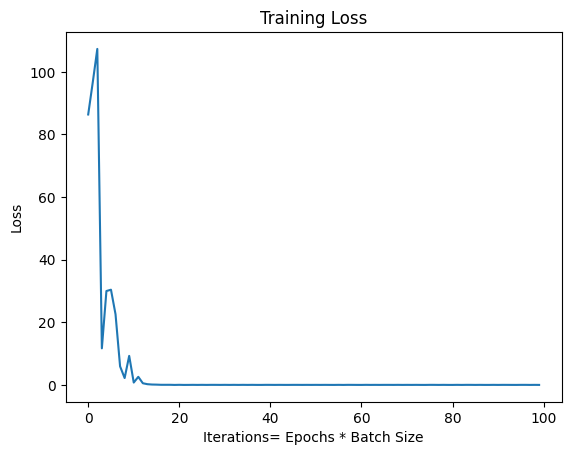

In [19]:
plt.plot(loss_values)
plt.title("Training Loss")
plt.xlabel("Iterations= Epochs * Batch Size")
plt.ylabel("Loss")

# Prediction

In [20]:
val_x = [[10, 11]]

In [21]:
myNet(torch.tensor(val_x).float().to(device))

tensor([[21.2120]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [22]:
myNet(torch.tensor([[13, 4]]).float().to(device))

tensor([[14.4612]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Save

In [23]:
model_path ="model.pth"
torch.save(myNet.state_dict(), model_path)

# Load and Predict

In [24]:
load_path = "model.pth"

model = MyNeuralNetwork().to(device)

model.load_state_dict(torch.load(load_path))

val = torch.tensor([[8,9],[10,11],[1.5,2.5]]).float().to(device)

model(val.to(device))

<ipython-input-24-f79943e3d5ed>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path))


tensor([[17.1235],
        [21.2120],
        [ 3.8359]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [26]:
val.sum(-1)

tensor([17., 21.,  4.], device='cuda:0')